<a href="https://colab.research.google.com/github/juanmggb/optimization-with-python/blob/main/genetic_algorithms/KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class Product(object):
    def __init__(self, name, weight, price):
        self.name = name
        self.weight = weight
        self.price = price
    def __str__(self):
        return f"{self.name} | {self.price} | {self.weight}"

In [2]:
product_list = []
product_list.append(Product('Refrigerator A', 0.751, 999.90));
product_list.append(Product('Cell phone', 0.0000899, 2199.12));
product_list.append(Product('TV 55', 0.400, 4346.99));
product_list.append(Product('TV 50', 0.290, 3999.90));
product_list.append(Product('TV 42', 0.200, 2999.00));
product_list.append(Product('Notebook A', 0.00350, 2499.90));
product_list.append(Product('Ventilador', 0.496, 199.90,));
product_list.append(Product('Microwave A', 0.0424, 308.66));
product_list.append(Product('Microwave B', 0.0544, 429.90));
product_list.append(Product('Microwave C', 0.0319, 299.29));
product_list.append(Product('Refrigerator B', 0.635, 849.00));
product_list.append(Product('Refrigerator C', 0.870, 1199.89));
product_list.append(Product('Notebook B', 0.498, 1999.90));
product_list.append(Product('Notebook C', 0.527, 3999.00));

In [3]:
names = []
weights = []
prices = []
for product in product_list:
    names.append(product.name)
    weights.append(product.weight)
    prices.append(product.price)

In [4]:
from numpy.random import randint
from random import random

In [5]:
class Individual(object):

    def __init__(self, weight_limit, weights, prices, generation):

        self.weight_limit = weight_limit
        self.weights = weights
        self.prices = prices
        self.generation = generation
        self.chromosome = [str(randint(0, 2)) for _ in range(len(prices))]

    def get_fitness(self):

        tot_price = 0
        weight = 0
        i = 0
        for gene in self.chromosome:
            if gene == '1':
                tot_price += self.prices[i]
                weight += self.weights[i]
            i += 1

        if weight > self.weight_limit:
            tot_price = 1

        return tot_price

    def crossover(self, ind2):

        rand_index = randint(0, len(self.chromosome))

        child1 = self.chromosome[:rand_index] + ind2.chromosome[rand_index:]
        child2 = ind2.chromosome[:rand_index] + self.chromosome[rand_index:]

        children = [
            Individual(self.weight_limit, self.weights, self.prices, self.generation + 1),
            Individual(self.weight_limit, self.weights, self.prices, self.generation + 1),
        ]

        children[0].chromosome = child1
        children[1].chromosome = child2

        return children

    def mutation(self, mut_rate):

        chromosome = self.chromosome.copy()
        for i in range(len(self.chromosome)):
            if random() < mut_rate:
                chromosome[i] = self._flip_gene(chromosome[i])

        self.chromosome = chromosome

        return self

    def _flip_gene(self, gene):

        if gene == '1':
            return '0'
        return '1'

    def __str__(self):

        return "".join(self.chromosome)

In [6]:
"".join(['1','0','0','0','1','0'])

'100010'

In [7]:
class Population(object):

    def __init__(self, population_size, weight_limit, weights, prices, mut_rate, cross_rate):
        self.population_size = population_size
        self.weight_limit = weight_limit
        self.weights = weights
        self.prices = prices
        self.mut_rate = mut_rate
        self.cross_rate = cross_rate

        self.individuals = [
            Individual(weight_limit=weight_limit,
                       weights=weights,
                       prices=prices,
                       generation=0) for _ in range(population_size)
        ]

    def get_fittest(self):

        sorted_individuals = sorted(self.individuals, key = lambda ind: ind.get_fitness(), reverse=True)

        return sorted_individuals[0]


    def selection(self):
        tot_fit = 0
        individuals = self.individuals.copy()
        n = len(individuals)

        for individual in individuals:
            tot_fit += individual.get_fitness()

        new_individuals = individuals.copy()
        for i in range(n):
            selection_point = random() * tot_fit
            sum_fit = 0
            j = 0
            while j < n and sum_fit <= selection_point:
                sum_fit += individuals[j].get_fitness()
                j += 1
            new_individuals[i] = individuals[j - 1]

        new_population = Population(
            self.population_size,
            self.weight_limit,
            self.weights,
            self.prices,
            self.mut_rate,
            self.cross_rate,
        )

        new_population.individuals = new_individuals
        return new_population


    def evolve_population(self, population):

        # Selection
        new_population = population.selection()
        # Crossover
        for i in range(0,len(new_population.individuals)-1, 2):
            if random() > self.cross_rate:
                parent1 = new_population.individuals[i]
                parent2 = new_population.individuals[i+1]
                children = parent1.crossover(parent2)

                # Mutation
                children[0].mutation(self.mut_rate)
                children[1].mutation(self.mut_rate)

                new_population.individuals[i] = children[0]
                new_population.individuals[i+1] = children[1]

        return new_population

In [8]:
x = [2,3,4, 6,4,2,1]

list(range(0,len(x)-1, 2))

[0, 2, 4]

In [9]:
class GeneticAlgorithm(object):

    def __init__(self, num_generations, population_size, weight_limit, weights, prices):


        self.num_generations = num_generations
        self.population_size = population_size
        self.weight_limit = weight_limit
        self.weights = weights
        self.prices = prices

    def run(self):

        # Initialize population
        population = Population(self.population_size,
                                self.weight_limit,
                                self.weights,
                                self.prices,
                                mut_rate = 0.05,
                                cross_rate=0.9)
        # Evaluate best fitness
        best_solution = population.get_fittest()
        best_fitness = [best_solution.get_fitness()]

        # Evaluate termination criteria
        for i in range(self.num_generations):
            if i % 50 == 0:
                print('Iteration', i, 'Best fitness', best_solution.get_fitness())
            # Evolve population
            population = population.evolve_population(population)
            # Evaluate best fitness
            best_solution = population.get_fittest()
            best_fitness.append(best_solution.get_fitness())


        return population, best_fitness

In [10]:
ga = GeneticAlgorithm(500,10,3, weights, prices)

In [11]:
population, best_fitness = ga.run()

Iteration 0 Best fitness 14894.679999999998
Iteration 50 Best fitness 13094.679999999998
Iteration 100 Best fitness 16131.75
Iteration 150 Best fitness 21552.46
Iteration 200 Best fitness 20352.57
Iteration 250 Best fitness 20552.47
Iteration 300 Best fitness 22673.61
Iteration 350 Best fitness 22552.370000000003
Iteration 400 Best fitness 22243.71
Iteration 450 Best fitness 22243.71


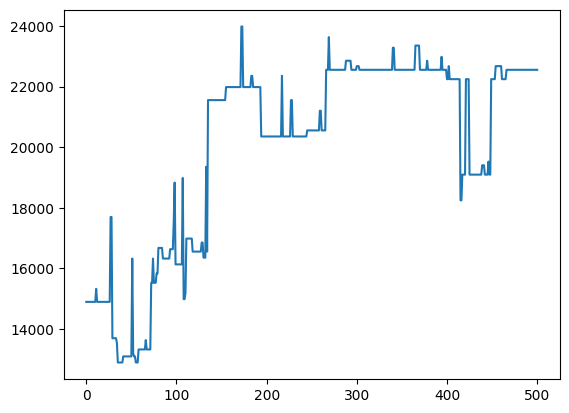

In [12]:
import matplotlib.pyplot as plt

plt.plot(best_fitness)